<a href="https://colab.research.google.com/github/RafsanJany-44/NLP_Research/blob/master/tensoreflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/RAZER/Downloads/dataset/NLP_DB/Main_Result.csv')

In [2]:
df

,Comments,Type
0,there is nothing else like khan academy out th...,1.0
1,sal is amazing. so is chemistry. i really real...,1.0
2,thanks khan academy! wish i had this series wh...,1.0
3,this was a really helpful video in understandi...,1.0
4,always stuns me how the study of the minute bl...,1.0
...,...,...
4531,is wondering y Mother Nature is making my life...,0.0
4532,"ouch, thats your achy back...so sorry ... i d...",0.0
4533,One lane stop and go trafffffffic suckssss! Al...,0.0
4534,the dog dug a hole in the backyard well iwas s...,0.0


In [3]:
df["Type"].value_counts()

1.0    2326
0.0    2002
Name: Type, dtype: int64

In [4]:
df.isnull().sum()

Comments     17
Type        208
dtype: int64

In [5]:

df = df.dropna().reset_index(drop=True)

In [6]:
df.isnull().sum()

Comments    0
Type        0
dtype: int64

In [7]:
df

,Comments,Type
0,there is nothing else like khan academy out th...,1.0
1,sal is amazing. so is chemistry. i really real...,1.0
2,thanks khan academy! wish i had this series wh...,1.0
3,this was a really helpful video in understandi...,1.0
4,always stuns me how the study of the minute bl...,1.0
...,...,...
4310,is wondering y Mother Nature is making my life...,0.0
4311,"ouch, thats your achy back...so sorry ... i d...",0.0
4312,One lane stop and go trafffffffic suckssss! Al...,0.0
4313,the dog dug a hole in the backyard well iwas s...,0.0


In [8]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [9]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Remove Non-Alphabetic Characters (including numbers)

In [11]:
import re

def convert_to_string(DF):
    DF["Comments"]= DF["Comments"].astype(str)
    
def cleanerFn(b):
    # keeps only words with alphabetic characters in comments
    for row in range(len(b)):
        line = b.loc[row, "Comments"]
        b.loc[row,"Comments"] = re.sub("[^a-zA-Z]", " ", line)

In [12]:
convert_to_string(df)

In [13]:
cleanerFn(df)
df.head()

,Comments,Type
0,there is nothing else like khan academy out th...,1.0
1,sal is amazing so is chemistry i really real...,1.0
2,thanks khan academy wish i had this series wh...,1.0
3,this was a really helpful video in understandi...,1.0
4,always stuns me how the study of the minute bl...,1.0


In [14]:

sentences = []
labels = []

for i in range(df.shape[0]):
    sentences.append(df['Comments'][i])
    labels.append(df['Type'][i])

### Dataset SPliting

In [15]:
training_size = 3600
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

### Tokenizer

In [16]:
vocab_size = 10000                                #the maximum number of words to keep
embedding_dim = 16
max_length = 200                                  #maximum length of all sequences.
trunc_type='post'                                 # remove values from sequences larger than maxlen
padding_type='post'                               #pad either before or after each sequence.
oov_tok = "<OOV>"                                 #used to replace out-of-vocabulary words during text_to_sequence calls



tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

#Transforms each text in texts to a sequence of integers. -> training data
training_sequences = tokenizer.texts_to_sequences(training_sentences)           

#This function transforms a list  of sequences into a 2D Numpy array of shape -> Training data
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)    


#Transforms each text in texts to a sequence of integers. -> testing data
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

#This function transforms a list  of sequences into a 2D Numpy array of shape -> testing data
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [17]:

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

### Building The Model

In [18]:

model = tf.keras.Sequential([
    
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    
    tf.keras.layers.GlobalAveragePooling1D(),
    
    tf.keras.layers.Dense(24, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [20]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
113/113 - 1s - loss: 0.6627 - accuracy: 0.6400 - val_loss: 1.0161 - val_accuracy: 0.0000e+00 - 1s/epoch - 13ms/step
Epoch 2/30
113/113 - 0s - loss: 0.6468 - accuracy: 0.6425 - val_loss: 1.0317 - val_accuracy: 0.0000e+00 - 338ms/epoch - 3ms/step
Epoch 3/30
113/113 - 0s - loss: 0.6314 - accuracy: 0.6425 - val_loss: 1.0118 - val_accuracy: 0.0000e+00 - 347ms/epoch - 3ms/step
Epoch 4/30
113/113 - 1s - loss: 0.5954 - accuracy: 0.6425 - val_loss: 0.9121 - val_accuracy: 0.0000e+00 - 507ms/epoch - 4ms/step
Epoch 5/30
113/113 - 0s - loss: 0.5293 - accuracy: 0.6981 - val_loss: 0.7663 - val_accuracy: 0.2545 - 400ms/epoch - 4ms/step
Epoch 6/30
113/113 - 0s - loss: 0.4364 - accuracy: 0.8633 - val_loss: 0.5644 - val_accuracy: 0.8070 - 367ms/epoch - 3ms/step
Epoch 7/30
113/113 - 0s - loss: 0.3436 - accuracy: 0.9353 - val_loss: 0.3644 - val_accuracy: 0.9678 - 362ms/epoch - 3ms/step
Epoch 8/30
113/113 - 0s - loss: 0.2717 - accuracy: 0.9450 - val_loss: 0.3164 - val_accuracy: 0.9594 - 353ms/epo

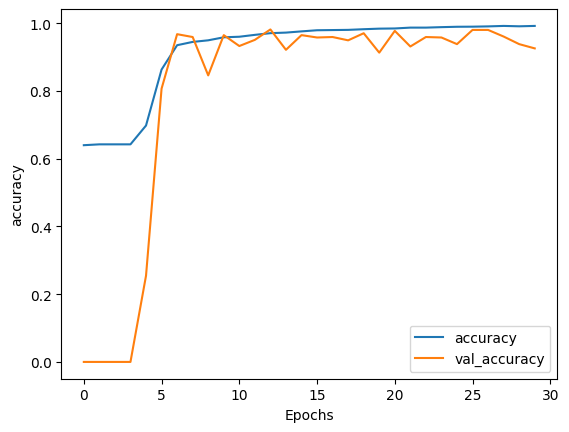

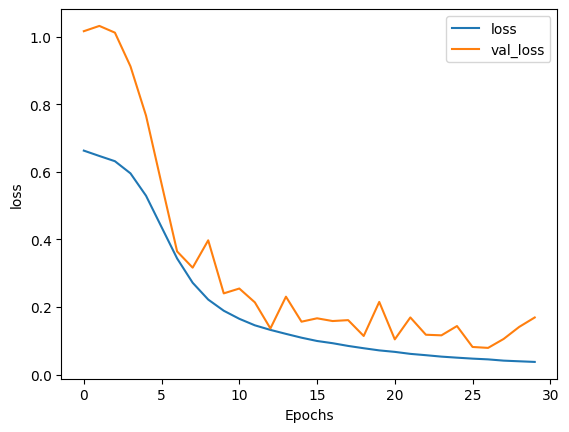

In [21]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Saving The model

In [22]:
import keras
model.save("my_model.keras")
reconstructed_model = keras.models.load_model("my_model.keras")

### Load and Check the Model Performence

In [23]:
sentence = ["This is a very helpfull tutorial", "Very bad playlist and not hlpfull","good vedio","that was bad"," 3456 56345cool 4bro","dude, i was gone","Mindblowing tutorial"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

for i,label in enumerate(reconstructed_model.predict(padded)):
    
    if label[0]>=0.50:
        print(sentence[i]," -- POSITIVE")
    else:
        print(sentence[i]," -- NEGATIVE")

1/1 [==============================] - 0s 69ms/step
This is a very helpfull tutorial  -- POSITIVE
Very bad playlist and not hlpfull  -- NEGATIVE
good vedio  -- POSITIVE
that was bad  -- NEGATIVE
 3456 56345cool 4bro  -- POSITIVE
dude, i was gone  -- NEGATIVE
Mindblowing tutorial  -- POSITIVE
